In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=sns.load_dataset("mpg")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.name.nunique()

305

In [6]:
df.drop(['name'], axis = 1, inplace = True)

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum().any()

False

In [10]:
df.shape

(392, 8)

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [12]:
from datetime import datetime

In [13]:
today = datetime.today()

In [14]:
this_year = today.year
this_year

2020

In [15]:
df['age'] = this_year-(1900 + df['model_year'])

In [16]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,50
1,15.0,8,350.0,165.0,3693,11.5,70,usa,50
2,18.0,8,318.0,150.0,3436,11.0,70,usa,50
3,16.0,8,304.0,150.0,3433,12.0,70,usa,50
4,17.0,8,302.0,140.0,3449,10.5,70,usa,50


In [17]:
df.drop(['model_year'], axis = 1, inplace = True)

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,18.0,8,307.0,130.0,3504,12.0,usa,50
1,15.0,8,350.0,165.0,3693,11.5,usa,50
2,18.0,8,318.0,150.0,3436,11.0,usa,50
3,16.0,8,304.0,150.0,3433,12.0,usa,50
4,17.0,8,302.0,140.0,3449,10.5,usa,50


In [19]:
df = pd.get_dummies(df, drop_first = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   age           392 non-null    int64  
 7   origin_japan  392 non-null    uint8  
 8   origin_usa    392 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 25.3 KB


In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,50,0,1
1,15.0,8,350.0,165.0,3693,11.5,50,0,1
2,18.0,8,318.0,150.0,3436,11.0,50,0,1
3,16.0,8,304.0,150.0,3433,12.0,50,0,1
4,17.0,8,302.0,140.0,3449,10.5,50,0,1


In [21]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
141,29.0,4,98.0,83.0,2219,16.5,46,0,0
140,14.0,8,304.0,150.0,4257,15.5,46,0,1
104,12.0,8,400.0,167.0,4906,12.5,47,0,1
6,14.0,8,454.0,220.0,4354,9.0,50,0,1
23,26.0,4,121.0,113.0,2234,12.5,50,0,0
377,31.0,4,91.0,68.0,1970,17.6,38,1,0
395,32.0,4,135.0,84.0,2295,11.6,38,0,1
63,14.0,8,400.0,175.0,4385,12.0,48,0,1
195,29.0,4,85.0,52.0,2035,22.2,44,0,1
365,20.2,6,200.0,88.0,3060,17.1,39,0,1


In [27]:
# X = df.iloc[:, 1:].values    # make them array for performance (for bigt data)

In [36]:
X = df.iloc[:, 1:]

In [37]:
y = df['mpg']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
model.intercept_

79.20294463155588

In [43]:
model.coef_

array([-0.34210131,  0.01920596, -0.0216204 , -0.00642267,  0.04219811,
       -0.79716146,  0.33046978, -2.87549946])

In [44]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])

In [45]:
coeff_df

,Coefficient
cylinders,-0.342101
displacement,0.019206
horsepower,-0.021620
weight,-0.006423
acceleration,0.042198
age,-0.797161
origin_japan,0.330470
origin_usa,-2.875499


In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred

array([26.62308629, 26.90246949, 34.26598184, 24.44117617, 28.23541424,
       30.1825394 ,  8.56100481, 30.34916333, 20.38153598, 29.44628713,
       12.74639826, 24.90246444, 16.90383129, 29.26573592, 22.69002521,
       29.01139375, 20.1273859 , 33.14407006, 26.35414107, 30.96911914,
       18.62424125, 35.63889895, 35.27942909, 14.81946638, 29.28017777,
       26.41101276, 21.6842468 , 15.83161913, 29.59833633, 24.88379141,
       13.37959723, 23.41302619, 20.81168747, 31.62899703, 12.3989298 ,
       36.04242383, 10.58135858, 23.90100171, 11.19643551,  6.94845354,
       12.68311718, 28.38719238, 35.88785647, 27.18142137, 11.91912268,
        9.97909932, 17.40713084, 32.34687072, 24.02663951, 31.13303701,
       11.85297985, 26.04081368, 22.75426327, 35.0138902 , 28.42903068,
       17.61471732, 20.25432749, 22.65581157, 23.40456421, 25.50148875,
        8.66368711, 22.63841676, 25.63063799, 24.08991433, 29.67539514,
       29.69088567, 25.44467515, 30.32743592, 21.76693112, 10.23

In [49]:
eval_metrics(y_test, y_pred)

r2_score: 0.7922774714022587 
 mae: 2.4619996980661445 
 mse: 10.602279011688337 
 rmse: 3.2561140968473965


In [56]:
print(model.score(X_test, y_test)* 100)

79.22774714022587


<AxesSubplot:xlabel='mpg'>

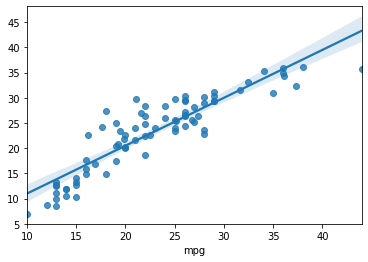

In [50]:
sns.regplot(y_test, y_pred)

In [52]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [53]:
compare.sample(10)

,Actual,Pred
94,13.0,9.979099
349,34.1,35.279429
358,31.6,31.628997
235,26.0,30.349163
270,21.1,29.675395
85,13.0,13.278173
197,29.0,31.133037
22,25.0,23.404564
157,15.0,13.379597
15,22.0,18.624241


In [61]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

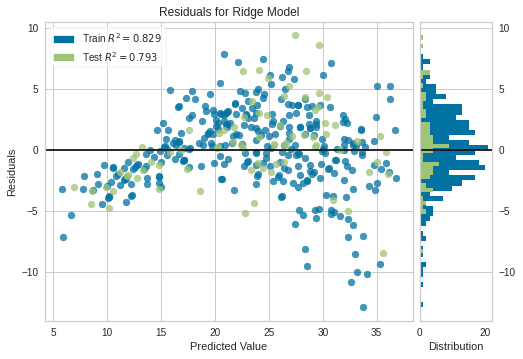

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [64]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

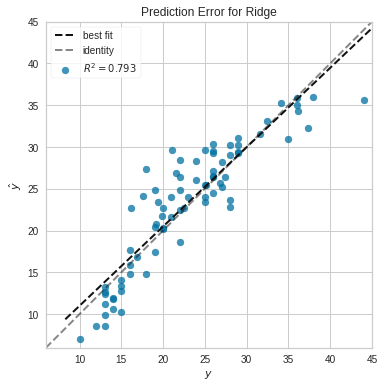

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [66]:
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure